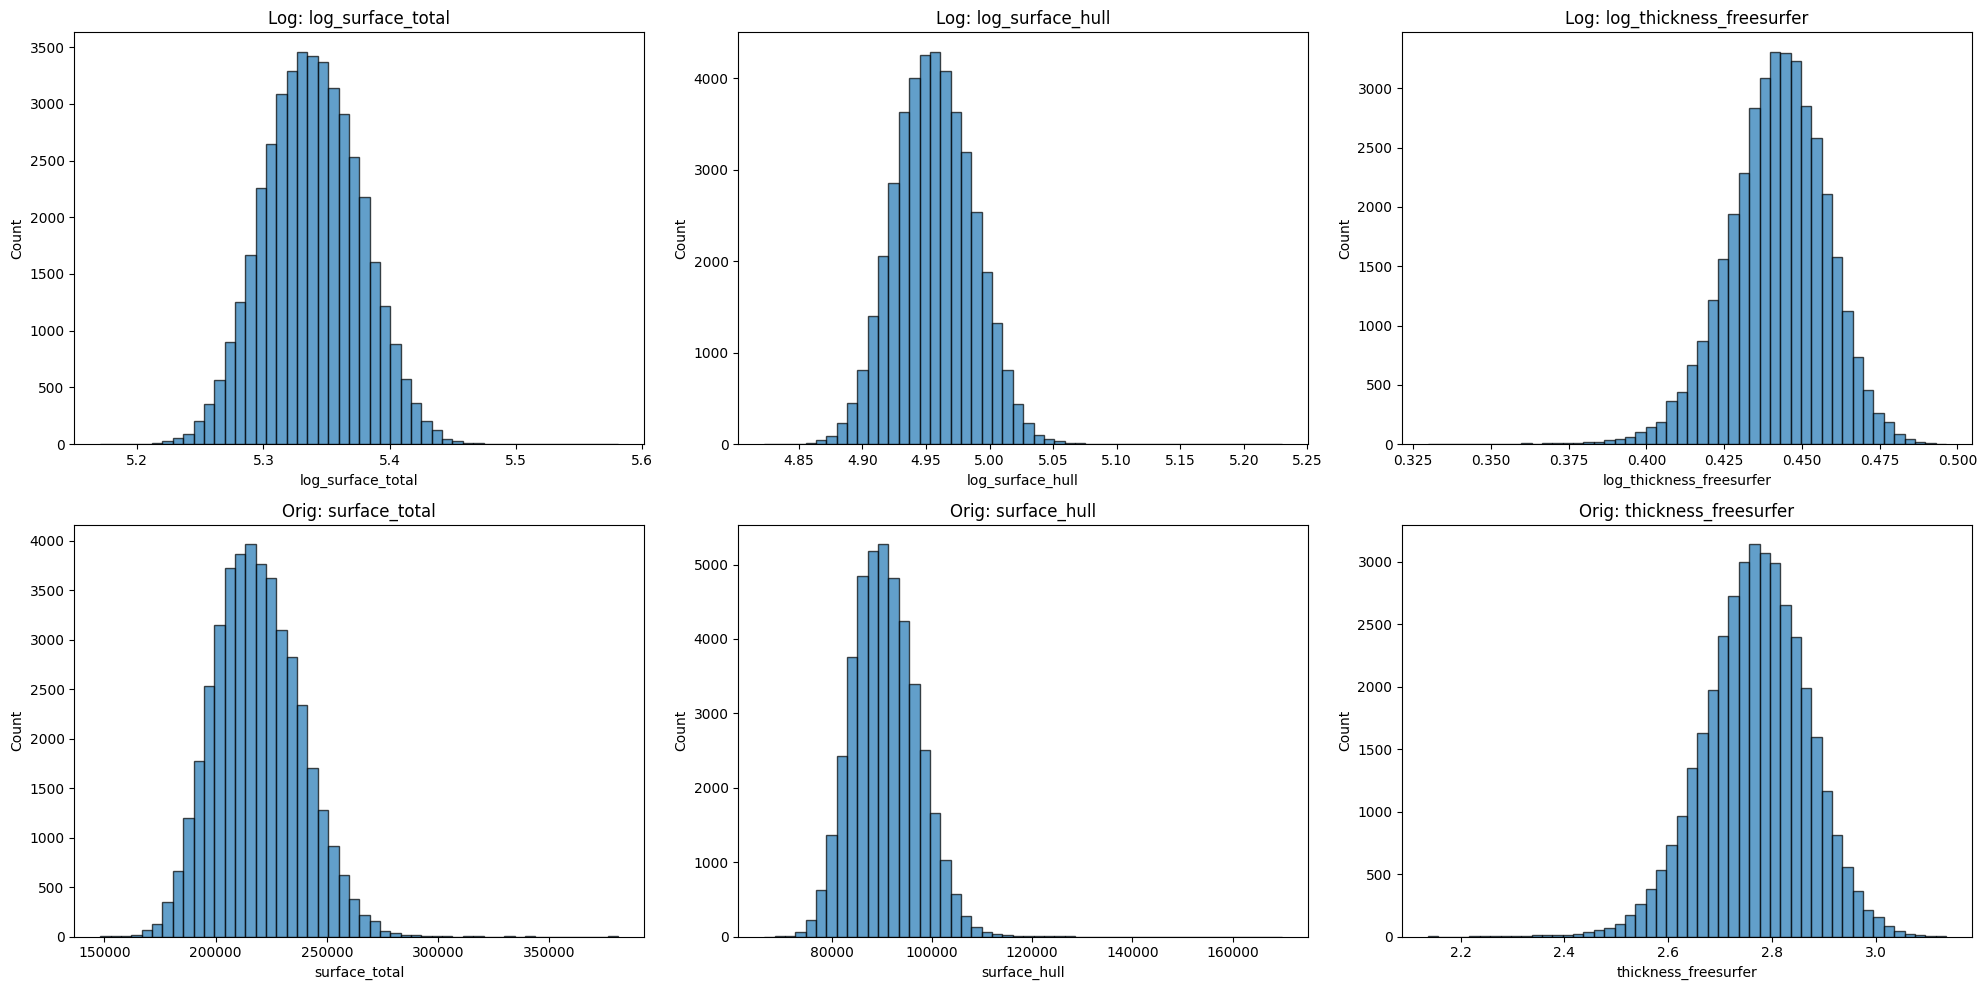

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
log_file = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/log_thickness_surface_Age.csv"
orig_file = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/thickness_surface_Age.csv"

# Load data
df_log = pd.read_csv(log_file)
df_orig = pd.read_csv(orig_file)

# Columns to plot
log_cols  = ['log_surface_total',  'log_surface_hull', 'log_thickness_freesurfer']
orig_cols = ['surface_total',    'surface_hull',      'thickness_freesurfer']

# Create figure with 2 rows × 4 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Plot log-transformed distributions
for i, col in enumerate(log_cols):
    ax = axes[0, i]
    data = df_log[col].dropna()
    ax.hist(data, bins=50, alpha=0.7, edgecolor='black')
    ax.set_title(f"Log: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

# Plot original distributions
for i, col in enumerate(orig_cols):
    ax = axes[1, i]
    data = df_orig[col].dropna()
    ax.hist(data, bins=50, alpha=0.7, edgecolor='black')
    ax.set_title(f"Orig: {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import numpy as np

def estimate_sigma(X: np.ndarray) -> np.ndarray:
    """
    Scott's‐rule estimate of per‐dimension sigma:
        σ_j = sqrt(var(X_j)) * n^{-1/(d+4)}
    where var uses ddof=1 (unbiased), n = # samples, d = # dims.
    """
    n, d = X.shape
    factor = n ** (-1.0 / (d + 4))
    variances = np.var(X, axis=0, ddof=1)
    return np.sqrt(variances) * factor

# 1) Paths
orig_path = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/thickness_surface_Age.csv"
log_path  = "/neurospin/dico/data/deep_folding/current/datasets/UkBioBank40/log_thickness_surface_Age.csv"

# 2) Column sets
orig_cols = ["surface_total",  "surface_hull", "thickness_freesurfer"]
log_cols  = ["log_surface_total", "log_surface_hull", "log_thickness_freesurfer"]

# 3) Load & clean
df_orig = pd.read_csv(orig_path, usecols=orig_cols).dropna()
df_log  = pd.read_csv(log_path,  usecols=log_cols).dropna()

# 4) Convert to numpy
X_orig = df_orig.values  # shape (n, 4)
X_log  = df_log.values

# 5) Estimate σ
sigma_orig = estimate_sigma(X_orig)
sigma_log  = estimate_sigma(X_log)

# 6) Report
print(f"Original data: n={X_orig.shape[0]}, d={X_orig.shape[1]}")
for col, s in zip(orig_cols, sigma_orig):
    print(f"  σ_{col:>24} = {s:.6f}")

print(f"\nLog‐transformed data: n={X_log.shape[0]}, d={X_log.shape[1]}")
for col, s in zip(log_cols, sigma_log):
    print(f"  σ_{col:>24} = {s:.6f}")


Original data: n=37775, d=3
  σ_           surface_total = 4260.360742
  σ_            surface_hull = 1421.770324
  σ_    thickness_freesurfer = 0.022022

Log‐transformed data: n=37775, d=3
  σ_       log_surface_total = 0.008430
  σ_        log_surface_hull = 0.006774
  σ_log_thickness_freesurfer = 0.003478
